In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt


DATASET_PATH = "data.json"

In [ ]:
def load_data(dataset_path):
  with open(dataset_path,"r") as fp:
    data = json.load(fp)

    inputs = np.array(data['mfcc'])
    targets = np.array(data['labels'])

    return inputs, targets

In [ ]:
 # load data
X, y = load_data(DATASET_PATH)
    # create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)



In [ ]:
input_shape = (X_train.shape[1],X_train.shape[2])

In [ ]:
model = keras.Sequential()

    # 2 LSTM layers
model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.LSTM(64))

      # dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

      # output layer
model.add(keras.layers.Dense(3, activation='softmax'))

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 259, 128)          72704     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 126,467
Trainable params: 126,467
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
7/7 [==============================] - 8s 592ms/step - loss: 1.1030 - accuracy: 0.3662 - val_loss: 1.0945 - val_accuracy: 0.3148
Epoch 2/30
7/7 [==============================] - 3s 445ms/step - loss: 1.0482 - accuracy: 0.4977 - val_loss: 1.0697 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 3s 441ms/step - loss: 1.0445 - accuracy: 0.4836 - val_loss: 1.0463 - val_accuracy: 0.5556
Epoch 4/30
7/7 [==============================] - 3s 449ms/step - loss: 1.0326 - accuracy: 0.5117 - val_loss: 1.0239 - val_accuracy: 0.5741
Epoch 5/30
7/7 [==============================] - 3s 440ms/step - loss: 1.0033 - accuracy: 0.5446 - val_loss: 1.0016 - val_accuracy: 0.5741
Epoch 6/30
7/7 [==============================] - 3s 442ms/step - loss: 0.9945 - accuracy: 0.5587 - val_loss: 0.9788 - val_accuracy: 0.5926
Epoch 7/30
7/7 [==============================] - 3s 440ms/step - loss: 0.9557 - accuracy: 0.6291 - val_loss: 0.9555 - val_accuracy: 0.6296
Epoch 8/30
7/7 [====

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 0.3969 - accuracy: 0.8427 - 322ms/epoch - 107ms/step

Test accuracy: 0.8426966071128845


In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

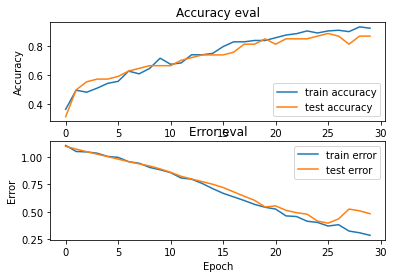

In [ ]:
plot_history(history)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(y_test,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.93      0.75      0.83        36
           2       0.78      0.86      0.82        21

    accuracy                           0.84        89
   macro avg       0.84      0.85      0.84        89
weighted avg       0.85      0.84      0.84        89
 



In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['COASTAL','RAYALSEEMA','TELANGANA'], 
                     columns = ['COASTAL','RAYALSEEMA','TELANGANA'])

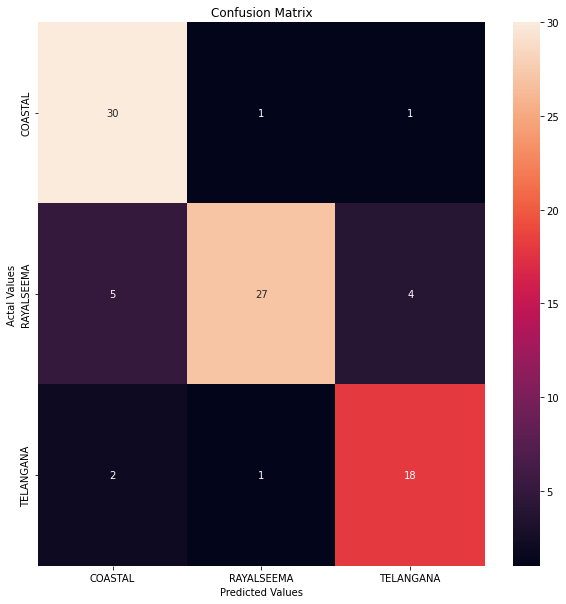

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()